In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Crear el DataFrame
data = {
    'x1': [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
    'x2': [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
    'x3': [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
    'x4': [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12],
    'y': [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
df


,x1,x2,x3,x4,y
0,7,26,6,60,78.5
1,1,29,15,52,74.3
2,11,56,8,20,104.3
3,11,31,8,47,87.6
4,7,52,6,33,95.9
5,11,55,9,22,109.2
6,3,71,17,6,102.7
7,1,31,22,44,72.5
8,2,54,18,22,93.1
9,21,47,4,26,115.9


In [19]:
# Definir las variables independientes y dependientes
X = df[['x1', 'x2', 'x3', 'x4']]
X = sm.add_constant(X)  # Añadir una constante para el intercepto
y = df['y']

# Ajustar el modelo
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.5
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           4.76e-07
Time:                        13:53:39   Log-Likelihood:                -26.918
No. Observations:                  13   AIC:                             63.84
Df Residuals:                       8   BIC:                             66.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4054     70.071      0.891      0.3

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


In [20]:
# Obtener los residuos
residuals = model.resid

# Mostrar los residuos
residuals

,0
0,0.004760
1,1.511201
2,-1.670938
3,-1.727100
4,0.250756
5,3.925443
6,-1.448669
7,-3.174989
8,1.378349
9,0.281548


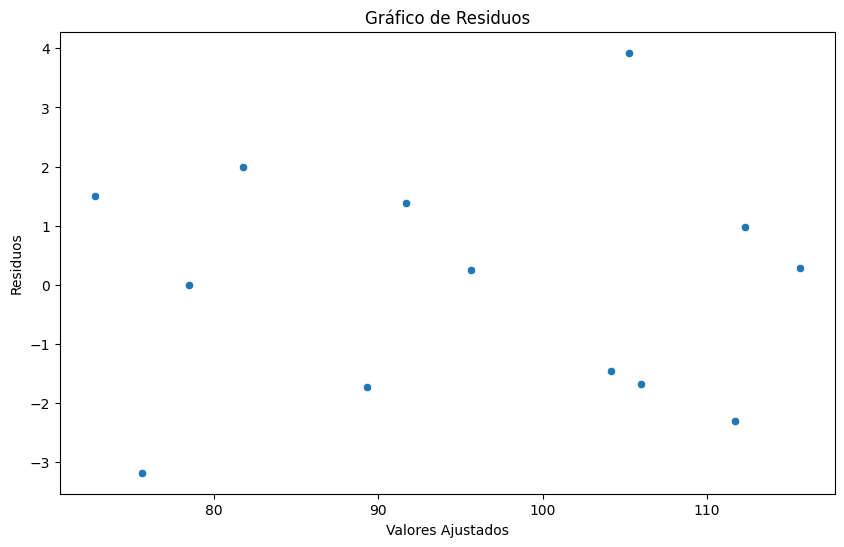

In [21]:
# Graficar los residuos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos X e y
model.fit(X, y)

# Predicciones
y_pred = model.predict(X)

# Imprimir los coeficientes y la intersección (término independiente)
print("Coeficientes: ", model.coef_)
print("Intersección: ", model.intercept_)

# Imprimir el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R^2)
print("Mean Squared Error (MSE): ", mean_squared_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))


Coeficientes:  [ 0.          1.55110265  0.51016758  0.1019094  -0.14406103]
Intersección:  62.405369299917766
Mean Squared Error (MSE):  3.6818184115768497
R^2:  0.9823756204076801
